In [1]:
!python -V

Python 3.9.12


In [2]:
import pandas as pd

In [89]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [5]:
!pip install pyarrow

In [35]:
df = pd.read_parquet('./data/green_tripdata_2024-01.parquet')

In [36]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

In [37]:
td = df['duration'].iloc[0]

In [38]:
df['duration'] = df.duration.apply(lambda td: td.total_seconds()/60)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

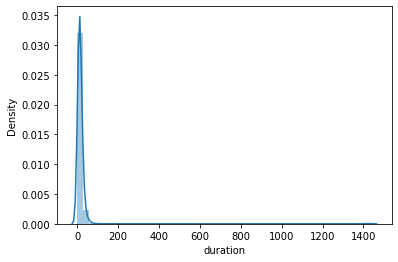

In [39]:
sns.distplot(df.duration)

In [40]:
df.duration.describe()

count    56551.000000
mean        18.171379
std         75.464751
min          0.000000
25%          7.250000
50%         11.400000
75%         17.316667
max       1438.983333
Name: duration, dtype: float64

In [41]:
df.duration.describe(percentiles = [0.95, 0.98, 0.99])

count    56551.000000
mean        18.171379
std         75.464751
min          0.000000
50%         11.400000
95%         33.683333
98%         46.816667
99%         59.825000
max       1438.983333
Name: duration, dtype: float64

In [42]:
((df.duration >=1) & (df.duration <=60)).mean()

0.9614860921999611

In [43]:
df = df[(df.duration >=1) & (df.duration <=60)]

In [44]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.80,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.30,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.80,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.20,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.60,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,2,2024-01-31 20:46:00,2024-01-31 20:55:00,None,NaN,33,25,NaN,0.00,11.58,...,0.0,3.14,0.0,NaN,1.0,15.72,NaN,NaN,NaN,9.000000
56547,2,2024-01-31 21:06:00,2024-01-31 21:11:00,None,NaN,72,72,NaN,0.49,11.58,...,0.0,0.00,0.0,NaN,1.0,12.58,NaN,NaN,NaN,5.000000
56548,2,2024-01-31 21:36:00,2024-01-31 21:40:00,None,NaN,72,72,NaN,0.52,11.58,...,0.0,2.52,0.0,NaN,1.0,15.10,NaN,NaN,NaN,4.000000
56549,2,2024-01-31 22:45:00,2024-01-31 22:51:00,None,NaN,41,42,NaN,1.17,14.22,...,0.0,0.00,0.0,NaN,1.0,15.22,NaN,NaN,NaN,6.000000


In [45]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [46]:
df[categorical] = df[categorical].astype(str)

In [47]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.80,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.30,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.80,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.20,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.60,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,2,2024-01-31 20:46:00,2024-01-31 20:55:00,None,NaN,33,25,NaN,0.00,11.58,...,0.0,3.14,0.0,NaN,1.0,15.72,NaN,NaN,NaN,9.000000
56547,2,2024-01-31 21:06:00,2024-01-31 21:11:00,None,NaN,72,72,NaN,0.49,11.58,...,0.0,0.00,0.0,NaN,1.0,12.58,NaN,NaN,NaN,5.000000
56548,2,2024-01-31 21:36:00,2024-01-31 21:40:00,None,NaN,72,72,NaN,0.52,11.58,...,0.0,2.52,0.0,NaN,1.0,15.10,NaN,NaN,NaN,4.000000
56549,2,2024-01-31 22:45:00,2024-01-31 22:51:00,None,NaN,41,42,NaN,1.17,14.22,...,0.0,0.00,0.0,NaN,1.0,15.22,NaN,NaN,NaN,6.000000


In [48]:
df.dtypes

VendorID                          int32
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [49]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [25]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [27]:
X_train

<54373x449 sparse matrix of type '<class 'numpy.float64'>'
	with 163119 stored elements in Compressed Sparse Row format>

In [28]:
target = 'duration'
y_train = df[target].values

In [29]:
y_train

array([11.5       , 20.86666667, 19.03333333, ...,  4.        ,
        6.        , 31.        ])

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_train)

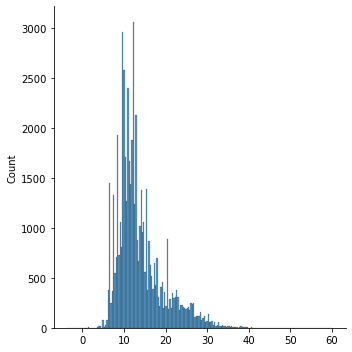

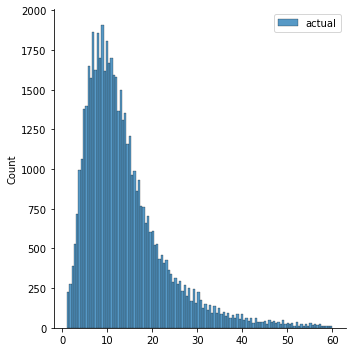

In [32]:
sns.displot(y_pred, label='prediction')
sns.displot(y_train, label='actual')

plt.legend()

In [33]:
mean_squared_error(y_train, y_pred, squared=False)

7.081905382194463

In [59]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df['duration'] = df.duration.apply(lambda td: td.total_seconds()/60)

    df = df[(df.duration >=10) & (df.duration <=60)]

    categorical = ['PULocationID', 'DOLocationID']
    numerical = ['trip_distance']

    df[categorical] = df[categorical].astype(str)
    
    return df

In [60]:
df_train = read_dataframe('./data/green_tripdata_2024-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2024-02.parquet')

In [61]:
len(df_train), len(df_val)

(32516, 30789)

In [82]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [83]:
df_val

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
1,2,2024-01-31 22:59:22,2024-01-31 23:27:14,N,1.0,43,242,1.0,7.76,36.60,...,0.00,0.00,NaN,1.0,39.10,2.0,1.0,0.00,27.866667,43_242
3,2,2024-01-31 23:56:42,2024-02-01 00:06:53,N,1.0,80,17,2.0,1.36,11.40,...,4.17,0.00,NaN,1.0,18.07,1.0,1.0,0.00,10.183333,80_17
8,2,2024-02-01 00:00:54,2024-02-01 00:11:36,N,5.0,92,223,1.0,5.88,25.00,...,5.20,0.00,NaN,1.0,31.20,1.0,2.0,0.00,10.700000,92_223
9,2,2024-02-01 00:33:58,2024-02-01 00:55:06,N,1.0,255,48,5.0,5.10,25.40,...,3.76,6.94,NaN,1.0,41.35,1.0,1.0,2.75,21.133333,255_48
12,2,2024-02-01 00:42:11,2024-02-01 01:01:10,N,1.0,210,265,1.0,16.50,61.10,...,0.00,0.00,NaN,1.0,63.60,2.0,1.0,0.00,18.983333,210_265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53572,2,2024-02-29 21:07:00,2024-02-29 21:34:00,None,NaN,223,137,NaN,5.43,32.16,...,7.18,0.00,NaN,1.0,43.09,NaN,NaN,NaN,27.000000,223_137
53573,2,2024-02-29 22:35:38,2024-02-29 22:46:25,None,NaN,256,37,NaN,1.50,2.70,...,2.74,0.00,NaN,1.0,6.44,NaN,NaN,NaN,10.783333,256_37
53574,2,2024-02-29 22:14:00,2024-02-29 22:39:00,None,NaN,75,33,NaN,10.07,47.14,...,15.27,0.00,NaN,1.0,66.16,NaN,NaN,NaN,25.000000,75_33
53575,2,2024-02-29 22:41:00,2024-02-29 22:53:00,None,NaN,97,33,NaN,1.54,12.22,...,3.30,0.00,NaN,1.0,16.52,NaN,NaN,NaN,12.000000,97_33


In [84]:
categorical = ['PU_DO'] #['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)


val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [85]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

6.583287618131041

In [91]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [87]:
lr = Lasso(alpha=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

6.963984182419398

In [88]:
lr = Ridge(alpha=0.1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

8.295601756048848